<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-01-03 to 2022-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   251 non-null    float64
 1   High    251 non-null    float64
 2   Low     251 non-null    float64
 3   Open    251 non-null    float64
 4   Volume  251 non-null    float64
dtypes: float64(5)
memory usage: 11.8 KB
None


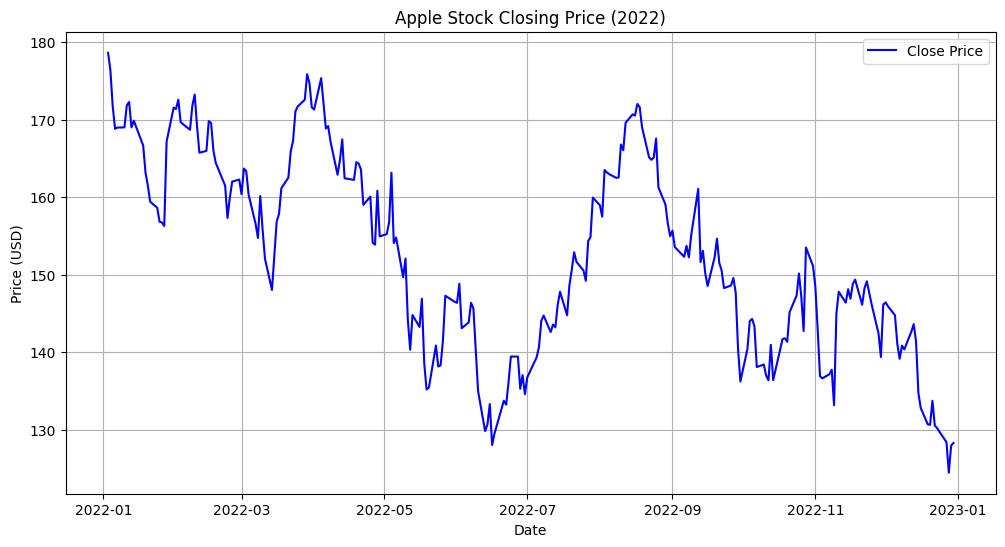

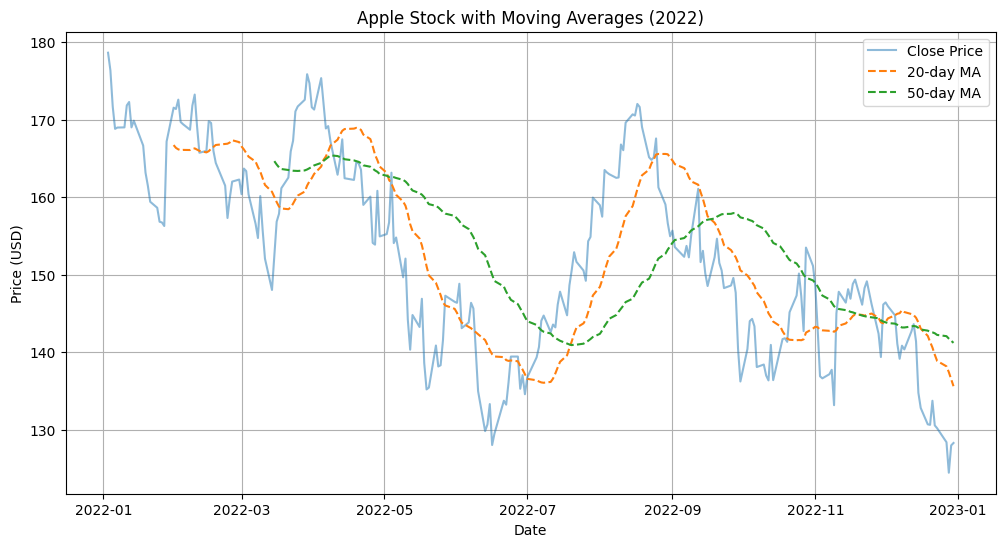

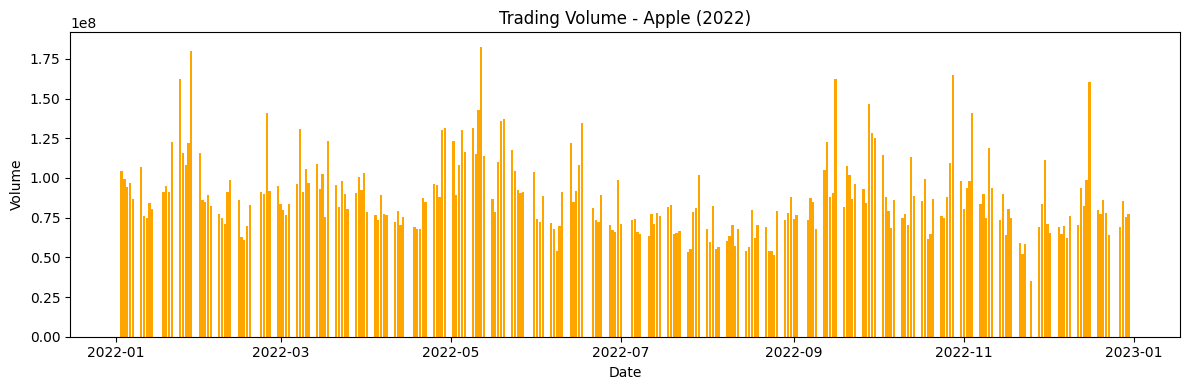

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = r"C:\Users\vasan\StockMarketPrediction\src\data\data_raw\aapl_2022.csv"

# Step 1: Read CSV and skip the 2 junk rows
df = pd.read_csv(file_path, skiprows=2, header=None)

# Step 2: Set proper column names
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Step 3: Drop any rows where 'Date' is not a proper date string
df = df[df['Date'].str.match(r'\d{4}-\d{2}-\d{2}', na=False)]

# Step 4: Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")

# Step 5: Set 'Date' as index
df.set_index('Date', inplace=True)

# Final check
print(df.info())
df.head()



plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Close Price", color="blue")
plt.title("Apple Stock Closing Price (2022)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show()

df["MA20"] = df["Close"].rolling(window=20).mean()
df["MA50"] = df["Close"].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Close Price", alpha=0.5)
plt.plot(df.index, df["MA20"], label="20-day MA", linestyle="--")
plt.plot(df.index, df["MA50"], label="50-day MA", linestyle="--")
plt.title("Apple Stock with Moving Averages (2022)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.bar(df.index, df["Volume"], color="orange")
plt.title("Trading Volume - Apple (2022)")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.tight_layout()
plt.show()
